# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN

data: pd.DataFrame = pd.read_csv(
    filepath_or_buffer="../data_processing/cleaned_dataset.csv"
)

# Prepare Data

In [2]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81343 entries, 0 to 81342
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      81343 non-null  int64  
 1   Unnamed: 0        81343 non-null  int64  
 2   popularity        81343 non-null  int64  
 3   duration_s        81343 non-null  float64
 4   explicit          81343 non-null  int64  
 5   danceability      81343 non-null  float64
 6   energy            81343 non-null  float64
 7   key               81343 non-null  int64  
 8   loudness          81343 non-null  float64
 9   mode              81343 non-null  int64  
 10  speechiness       81343 non-null  float64
 11  acousticness      81343 non-null  float64
 12  instrumentalness  81343 non-null  float64
 13  liveness          81343 non-null  float64
 14  valence           81343 non-null  float64
 15  tempo             81343 non-null  float64
 16  time_signature    81343 non-null  int64 

,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,20148,20148,0,166.346,0,0.628,0.6830,7,-5.565,0,0.0467,0.246000,0.000000,0.176,0.4620,99.800,4,dance
1,22030,22030,0,214.213,0,0.205,0.9500,10,-8.498,0,0.1310,0.000019,0.805000,0.212,0.3130,184.498,4,death-metal
2,14927,14927,0,198.000,0,0.478,0.7470,9,-5.176,1,0.2310,0.298000,0.000015,0.121,0.4970,172.943,4,children
3,64498,64498,0,160.026,0,0.334,0.0788,2,-15.333,0,0.0309,0.931000,0.001420,0.139,0.0627,59.054,4,jazz
4,78052,78052,0,191.102,0,0.657,0.9890,0,-1.919,1,0.1640,0.125000,0.000000,0.312,0.3530,130.015,4,party


# Feature Selection and Engineering

In [3]:
cluster_df = data.copy().sample(n=1000)
cluster_df = cluster_df.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "track_genre"])

cluster_df.head()

,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
36274,32,272.266,0,0.715,0.621,2,-6.183,1,0.0306,0.62200,0.000007,0.0603,0.8790,155.130,4
14605,18,121.853,0,0.371,0.710,1,-12.480,1,0.3390,0.39800,0.003950,0.3800,0.2880,123.928,3
803,0,183.000,0,0.383,0.454,2,-22.056,1,0.0810,0.93200,0.777000,0.1100,0.0593,118.984,3
25940,24,176.151,0,0.766,0.674,4,-5.749,0,0.2570,0.46000,0.000000,0.2940,0.3800,95.880,4
40366,35,207.098,0,0.536,0.561,7,-7.333,1,0.0273,0.00388,0.000025,0.2250,0.3870,139.947,4


/tmp/ipykernel_1432/1907750347.py:13: UserWarning: 
The palette list has fewer values (10) than needed (50) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


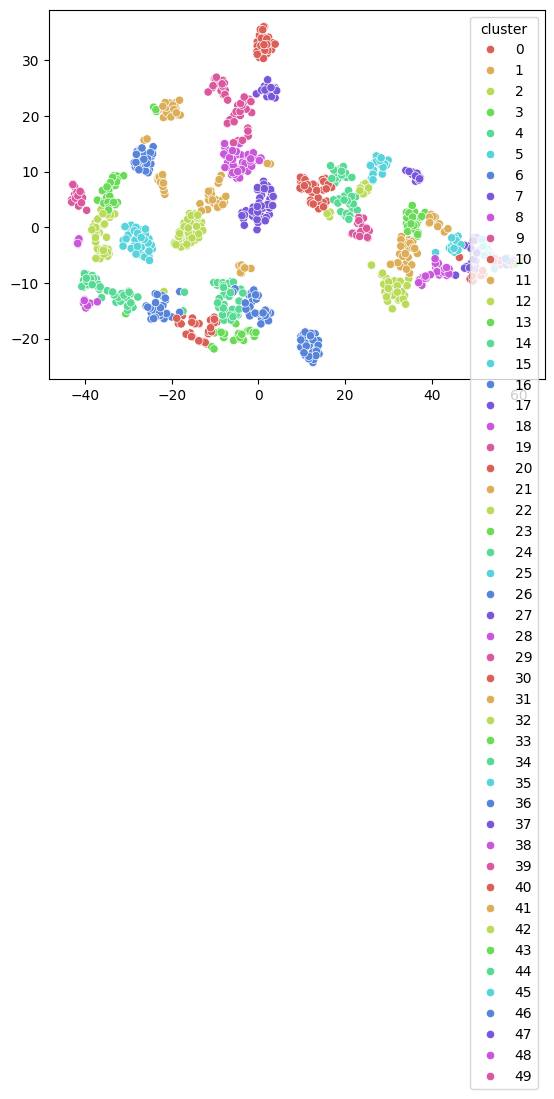

/tmp/ipykernel_1432/1907750347.py:13: UserWarning: 
The palette list has fewer values (10) than needed (50) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


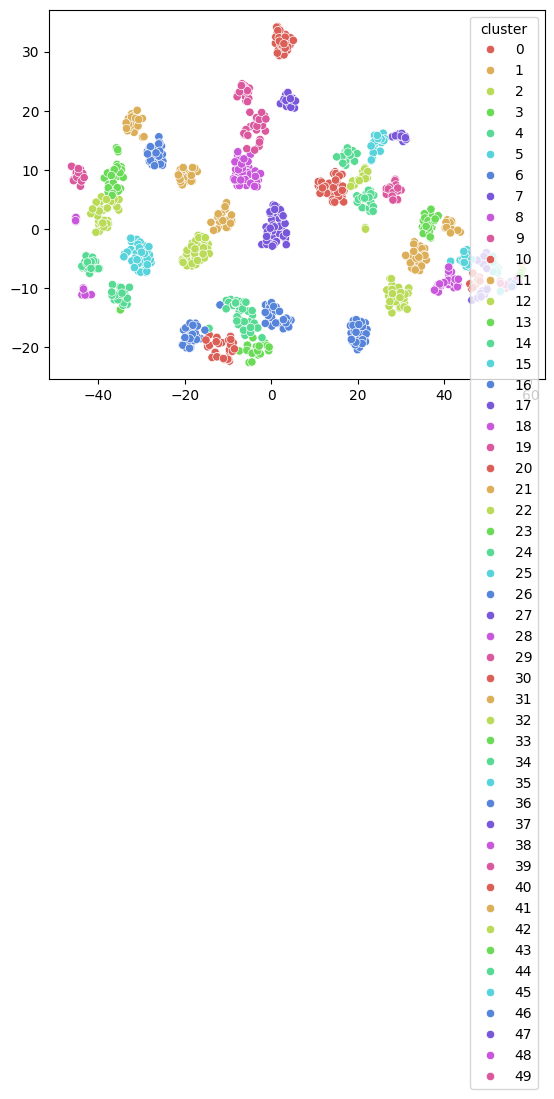

In [4]:
from sklearn.manifold import TSNE

def plot_tsne(df: pd.DataFrame, method: str):
    tsne: TSNE = TSNE(
        n_components=2,
        random_state=0,
        max_iter=1000,
        n_iter_without_progress=100,
        metric=method
    )
    tsne_df = tsne.fit_transform(df.select_dtypes(exclude=["object"]))

    sns.scatterplot(
        x=tsne_df[:, 0],
        y=tsne_df[:, 1],
        hue=df["cluster"],
        palette=sns.color_palette("hls", 10),
    )
    plt.show()

kmeans = KMeans(n_clusters=50)
kmeans.fit(cluster_df)
cluster_df["cluster"] = kmeans.labels_

for method in ["l2", "l1"]:
    plot_tsne(df=cluster_df, method=method)